# Iris

El problema de clasificación Iris es un clásico en el ámbito del aprendizaje automático y se utiliza comúnmente como un ejemplo para ilustrar técnicas de clasificación. Este conjunto de datos contiene tres especies de flores Iris (Iris setosa, Iris versicolor e Iris virgínica), con un total de 150 muestras. Cada muestra está definida por cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.

Los valores de los hiperparámetros con los que obtuve los resultados son:
- Optimizador: Adagrad
- Learning rate: 0.03
- Epochs :  1000
- Función de Activación : LeakyRelu
- Capas de la Red : 3
- Neuronas de cada capa : 4, 10 y 3

In [1]:
import numpy as np
import pandas as pd
from main.neural_network import train, test_nn, create_nn
from main.nn_components.activations_functions import Relu, Tanh, LeakyRelu, Sigmoid
from main.nn_components.optimazers import SGD, Adam, RMSProp, Adagrad, Momentum
from main.nn_components.loss_functions import CrossEntropyLoss
from sklearn.model_selection import train_test_split
from main.nn_components.graphic_regression import learning_curve
from sklearn.datasets import load_iris
from keras.utils import to_categorical
from main.nn_components.graphic_classification import display_confusion_matrix

In [2]:
X, y = load_iris(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


X_train = np.reshape(X_train, (112, 4, 1))
X_test = np.reshape(X_test, (38, 4, 1))

y_train = np.reshape(y_train, (112, 3, 1))
y_test = np.reshape(y_test, (38, 3, 1))

sample_df = pd.DataFrame(X_train[:, :, 0], columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
sample_df['Class'] = np.argmax(y_train[:, :, 0], axis=1)

class_counts = sample_df['Class'].value_counts()
styled_table = sample_df.head(10).style.set_table_attributes('style="width:70%"').set_caption("Primeras 10 muestras")
styled_table = styled_table.set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '12pt'), ('text-align', 'center')]
}, {
    'selector': 'td',
    'props': [('font-size', '10pt'), ('text-align', 'center')]
}])

display(styled_table)
print("--------------------------------------------------")
print(class_counts)

,Feature1,Feature2,Feature3,Feature4,Class
0,4.700000,3.200000,1.600000,0.200000,0
1,6.100000,3.000000,4.900000,1.800000,2
2,5.500000,3.500000,1.300000,0.200000,0
3,6.800000,3.000000,5.500000,2.100000,2
4,4.900000,3.000000,1.400000,0.200000,0
5,6.100000,2.600000,5.600000,1.400000,2
6,5.800000,2.700000,4.100000,1.000000,1
7,5.000000,2.000000,3.500000,1.000000,1
8,7.700000,3.000000,6.100000,2.300000,2
9,6.300000,2.300000,4.400000,1.300000,1


--------------------------------------------------
Class
1    38
0    37
2    37
Name: count, dtype: int64


In [3]:
optimizers = [
    Adagrad(learning_rate=0.04),
    Adagrad(learning_rate=0.07),
    Adagrad(learning_rate=0.07)
]

activations = [LeakyRelu(), LeakyRelu(), LeakyRelu()]

loss = CrossEntropyLoss()

nn = create_nn([4, 5, 6, 3], activation_function=activations, optimizers=optimizers)
train_loss = train(nn, loss, X_train, y_train, epochs=1000, batch_size=12)

Expanded_weights: (12, 5, 4) with Input shape: (12, 4, 1)
Output (input * weights): (12, 5, 1)
Output + bias: (12, 5, 1)
Expanded_weights: (12, 6, 5) with Input shape: (12, 5, 1)
Output (input * weights): (12, 6, 1)
Output + bias: (12, 6, 1)
Expanded_weights: (12, 3, 6) with Input shape: (12, 6, 1)
Output (input * weights): (12, 3, 1)
Output + bias: (12, 3, 1)
Y prediction SHAPE: (12, 3, 1)
y_true shape: (12, 3, 1), y_pred shape: (12, 3, 1)
y_true shape: (12, 3, 1), y_pred shape: (12, 3, 1)
Gradient Loss Shape: (12, 3, 1)
Output gradient Shape: (12, 3, 1)
Input Shape: (1, 6, 12)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 1)

In [42]:
y_true, y_pred = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 92.11%


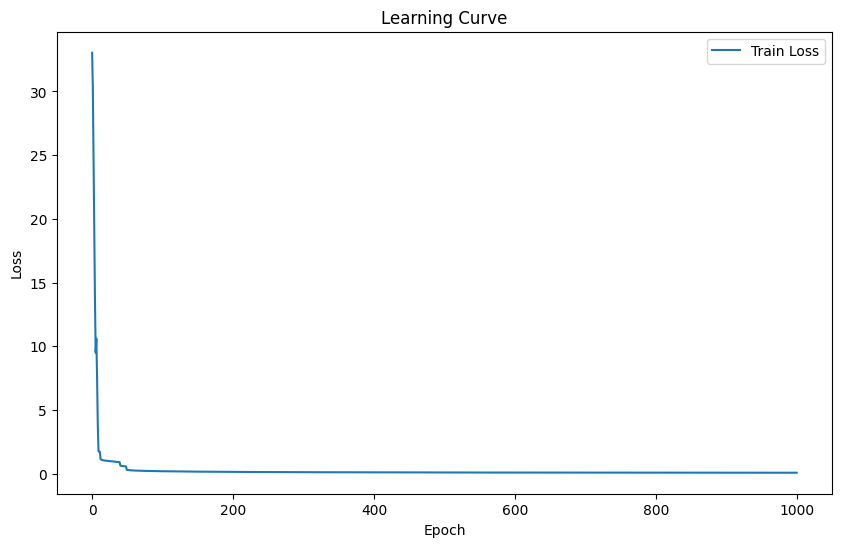

In [43]:
learning_curve(train_loss)

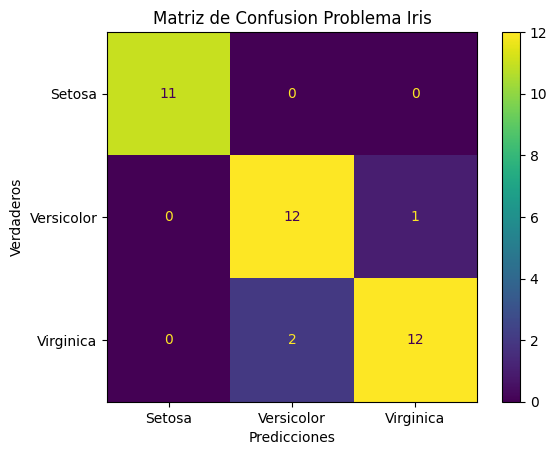

In [19]:
display_confusion_matrix(y_true, y_pred, ['Setosa', 'Versicolor', 'Virginica'], title='Matriz de Confusion Problema Iris')

# Experimentos Previos

### Test1

In [32]:
optimizers = [
    SGD(learning_rate=0.03),
    SGD(learning_rate=0.03),
    SGD(learning_rate=0.03)
]

activations = [Tanh(), Tanh(), Tanh()]

loss = CrossEntropyLoss()

nn = create_nn([4, 6, 4, 3], activation_function=activations, optimizers=optimizers)

In [33]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

Final Loss = 0.04450848962142867


In [34]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 89.47%


### Test2

In [35]:
optimizers = [
    RMSProp(learning_rate=0.02),
    RMSProp(learning_rate=0.02),
    RMSProp(learning_rate=0.02),
    RMSProp(learning_rate=0.02)
]

activations = [Tanh(), Tanh(), Tanh(), Tanh()]

loss = CrossEntropyLoss()

nn = create_nn([4, 10, 8, 4, 3], activation_function=activations, optimizers=optimizers)

In [36]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

Final Loss = 0.35577569221930244


In [37]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 86.84%


### Test3

In [53]:
optimizers = [
    Momentum(learning_rate=0.01),
    Adagrad(learning_rate=0.02)
]

activations = [Sigmoid(), Tanh()]

loss = CrossEntropyLoss()

nn = create_nn([4, 6, 3], activation_function=activations, optimizers=optimizers)

In [54]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

Final Loss = 0.08482302334458135


In [55]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 92.11%


### Test4

In [56]:
optimizers = [
    Adagrad(learning_rate=0.002)
]

activations = [Relu()]

loss = CrossEntropyLoss()

nn = create_nn([4, 3], activation_function=activations, optimizers=optimizers)

In [57]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

Final Loss = 23.592247973794418


In [58]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 39.47%
